In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r"D:\wine_review\output")


In [2]:
data = pd.read_csv(r"modelling_data_output.csv")

In [3]:

def string_length(x):
    string_len = len(x)
    return string_len

In [4]:
data = data[~data["price"].isna()]
data['log_price'] = np.log(data['price'])
data['description_length'] = data['cleaned_description'].apply(string_length)

In [5]:
columns = [i for i in data.columns if i not in ['id', 'cleaned_description', 'price','points', 'quality']]

In [6]:
X = data[columns]
y = data[['quality']]

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [8]:
#Using Principal Dimensional Reduction
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 4)


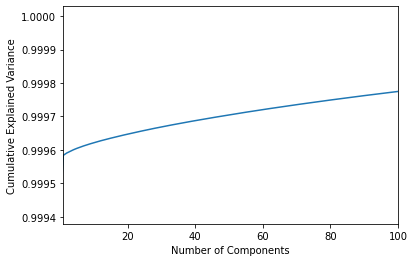

In [11]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA().fit(X)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim([1,100])
plt.show()

In [12]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [13]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
pca_df = pd.DataFrame(explained_variance)

In [14]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

C:\Users\VineetSajwan\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
 90%|████████████████████████████████████████████████████████████████████████▌        | 26/29 [16:48<11:51, 237.25s/it]

[01:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [17:21<00:00, 35.90s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.80               0.75    None      0.80   
ExtraTreesClassifier               0.80               0.74    None      0.80   
BaggingClassifier                  0.77               0.73    None      0.77   
DecisionTreeClassifier             0.74               0.71    None      0.74   
ExtraTreeClassifier                0.73               0.69    None      0.73   
NearestCentroid                    0.47               0.58    None      0.49   
KNeighborsClassifier               0.60               0.50    None      0.60   
AdaBoostClassifier                 0.53               0.50    None      0.53   
XGBClassifier                      0.62               0.50    None      0.61   
LGBMClassifier                     0.61               0.50    None      0.60   
QuadraticDiscriminantAnalysis      0.58 

In [15]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.80,0.75,None,0.80,27.28
ExtraTreesClassifier,0.80,0.74,None,0.80,11.94
BaggingClassifier,0.77,0.73,None,0.77,5.20
DecisionTreeClassifier,0.74,0.71,None,0.74,1.10
ExtraTreeClassifier,0.73,0.69,None,0.73,0.50
NearestCentroid,0.47,0.58,None,0.49,0.36
KNeighborsClassifier,0.60,0.50,None,0.60,1.62
AdaBoostClassifier,0.53,0.50,None,0.53,11.16
XGBClassifier,0.62,0.50,None,0.61,30.43


In [16]:
#models.to_csv(r"D:\wine_review\output\model_result.csv")

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [20]:
print('Best Score:', random_search.best_score_)
#y_pred = grid_search.predict(X_test)

Best Score: 0.7568677213550188


In [22]:
y_pred = random_search.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
class_ = list(data['quality'].unique())


                     precision    recall  f1-score   support

    Excellent wines       0.81      0.84      0.82     11059
    Very Good wines       0.89      0.68      0.77       216
         Good wines       0.77      0.80      0.78     10198
      Average wines       0.84      0.69      0.76      2472
Under Average wines       0.78      0.73      0.75      3502

           accuracy                           0.79     27447
          macro avg       0.82      0.75      0.78     27447
       weighted avg       0.79      0.79      0.79     27447



In [46]:
report = classification_report(y_test, y_pred, target_names=[i.replace(" wines","").replace(" ","_") for i in class_])

In [70]:
# Split report into rows
rows = report.split('\n')
row_list = [row.split() for row in rows[2:-3]]
print(row_list)
# Create DataFrame
df = pd.DataFrame(row_list, columns=['class', 'precision', 'recall', 'f1-score', 'support'])

# Set index to class names
df.set_index('class', inplace=True)

# Convert columns to numeric types
df = df.apply(pd.to_numeric, errors='ignore')

[['Excellent', '0.81', '0.84', '0.82', '11059'], ['Very_Good', '0.89', '0.68', '0.77', '216'], ['Good', '0.77', '0.80', '0.78', '10198'], ['Average', '0.84', '0.69', '0.76', '2472'], ['Under_Average', '0.78', '0.73', '0.75', '3502'], [], ['accuracy', '0.79', '27447']]


In [76]:
df_1 = df.reset_index()
df_1 = df_1[~df_1["class"].isin([None,"accuracy"])]
df_1["class"]=df_1["class"].str.replace("_"," ")
df_1.to_csv(r"D:\wine_review\output\evaluation_metrics.csv",index=False)

In [77]:
df_1

,class,precision,recall,f1-score,support
0,Excellent,0.81,0.84,0.82,11059.00
1,Very Good,0.89,0.68,0.77,216.00
2,Good,0.77,0.80,0.78,10198.00
3,Average,0.84,0.69,0.76,2472.00
4,Under Average,0.78,0.73,0.75,3502.00
